In [68]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.datasets import make_blobs

In [69]:
from sklearn.cluster import KMeans
import cv2

In [70]:
im = cv2.imread('elephant.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

original_shape = im.shape
print(original_shape)

(330, 500, 3)


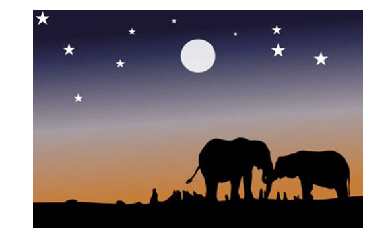

In [71]:
plt.imshow(im)
plt.grid(False)
plt.axis('off')
plt.show()

In [72]:
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


In [73]:
dominant_col = 4
kmeans = KMeans(n_clusters = dominant_col)
kmeans.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
centers = kmeans.cluster_centers_
centers = np.array(centers,'uint8')

In [75]:
print(centers)

[[ 98  94 117]
 [174 145 128]
 [  1   0   1]
 [ 38  35  64]]


### Plotting the colors

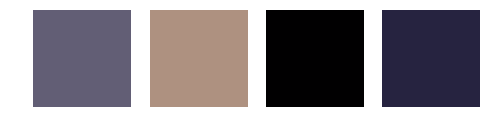

In [76]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()


### Segmenting our Image

In [89]:
new_img = np.zeros((330*500,3),dtype='uint8')

In [90]:
colors

[array([ 98,  94, 117], dtype=uint8),
 array([174, 145, 128], dtype=uint8),
 array([1, 0, 1], dtype=uint8),
 array([38, 35, 64], dtype=uint8)]

In [91]:
kmeans.labels_

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

In [92]:
for i in range(new_img.shape[0]):
    new_img[i] = colors[kmeans.labels_[i]]
    
new_img = new_img.reshape((original_shape))

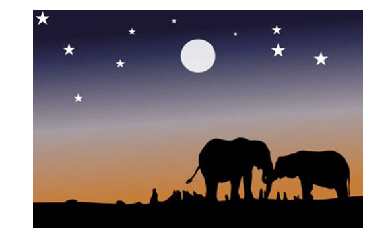

In [98]:
plt.grid(False)
plt.axis('off')
plt.imshow(im)
plt.show()

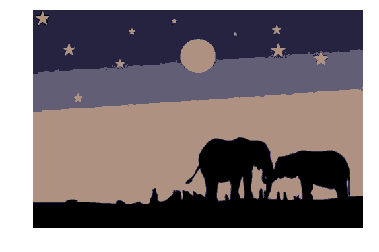

In [99]:
plt.grid(False)
plt.axis('off')
plt.imshow(new_img)
plt.show()